Carga el data set de Aerial Cactus Identification. Es un dataset de imágenes para
identificar si en la imagen hay un cactus o no. Tendremos una carpeta con imágenes y
un csv, vamos a transformar esas imágenes a un dataset. Posibles ideas:

a. Lee con pandas el archivo train_cactus.csv. Que tiene este dataset? Para leer
las imagenes hay que recorrer una columna del dataframe.

b. Estudia el módulo image del módulo tensorflow.keras.utils. Utiliza la
función load_img para cargar una imagen del dataset cualquiera.

i. Del mismo módulo anterior estudia la función img_to_array.
Transforma la imagen cargada en un array.

c. Escala el array entre 0 y 1 dividiendo por 255.

d. Creando diferentes listas, carga todas las imágenes en una lista de arrays.

In [1]:
import pandas as pd
import tensorflow as tf 
import keras
import numpy as np

In [2]:
dt = pd.read_csv("train_cactus.csv")

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17500 non-null  object
 1   has_cactus  17500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 273.6+ KB


In [4]:
dt.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [5]:
imagenes = []

for ima in dt.id:
    image = keras.utils.load_img(f"cactus/{ima}")
    input_arr = keras.utils.img_to_array(image)
    input_arr = np.array(input_arr)/255  # Convert single image to a batch.
    imagenes.append(input_arr)

print("Cantidad de imágenes cargadas:", len(imagenes))

Cantidad de imágenes cargadas: 17500


In [6]:
escactus = dt.has_cactus.values
escactus

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

Crea una red neuronal con:

a. 1 hidden layer convolucional y 32 neuronas y de tamaño 5x5.

b. Aplica un Max Pooling 2x2, con padding = ‘same’.

c. 1 hidden layer convolucional y 64 neuronas y de tamaño 3x3.

d. Aplica un Max Pooling 2x2, con padding = ‘same’.

e. 1 hidden layer convolucional y 64 neuronas y de tamaño 3x3.

f. Aplica un Max Pooling 2x2, con strides = 2.

g. Transforma los datos a un vector flattened.

h. 1 hidden layer con 100 neuronas.

i. 1 último layer que devuelva la probabilidad de que haya un cactus en la imagen.

j. Que dimensiones tiene los inputs y outputs de cada layer?

k. Entrena esta red neuronal.

l. Qué métricas obtienes en el test_set?

m. Haz un plot con la evolución por epoch de la performance del modelo.

n. Repite el modelo añadiendo dropout y regularización, donde deberías añadir el
dropout?

o. Añade el batch normalization después de cada layer convolucional, utilizando
model.add(BatchNormalization())

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = np.array(imagenes)
y = np.array(escactus)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/5
140/140 [==============================] - 33s 215ms/step - loss: 0.2090 - accuracy: 0.9258 - val_loss: 1.0629 - val_accuracy: 0.2746
Epoch 2/5
140/140 [==============================] - 29s 207ms/step - loss: 0.1064 - accuracy: 0.9596 - val_loss: 0.6261 - val_accuracy: 0.7780
Epoch 3/5
140/140 [==============================] - 33s 239ms/step - loss: 0.0870 - accuracy: 0.9674 - val_loss: 3.4308 - val_accuracy: 0.3386
Epoch 4/5
140/140 [==============================] - 31s 224ms/step - loss: 0.0731 - accuracy: 0.9729 - val_loss: 1.2991 - val_accuracy: 0.6529
Epoch 5/5
110/110 [==============================] - 5s 18ms/step - loss: 2.9724 - accuracy: 0.7737
Accuracy en el conjunto de prueba: 0.7737143039703369


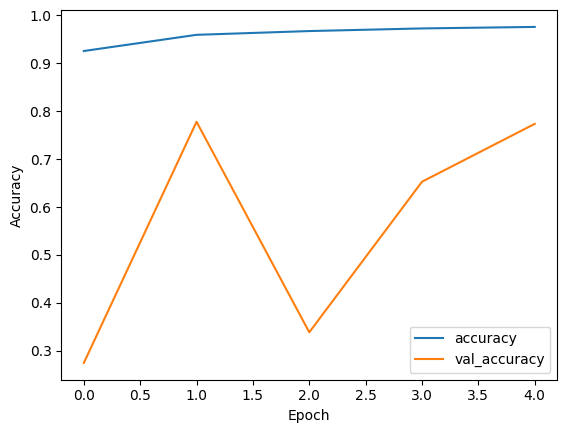

In [10]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Inicializar el modelo
model = Sequential()

# Capa convolucional 1 + BatchNormalization + Dropout
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout después de la capa de MaxPooling

# Capa convolucional 2 + BatchNormalization + Dropout
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout después de la capa de MaxPooling

# Capa convolucional 3 + BatchNormalization + Dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Dropout(0.25))  # Dropout después de la capa de MaxPooling

# Flatten para convertir los datos a un vector
model.add(Flatten())

# Capa fully connected + Dropout
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout antes de la capa de salida

# Capa de salida con activación sigmoid para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy en el conjunto de prueba: {test_acc}')

# Plot de la precisión del entrenamiento y validación por epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Inicializar el modelo
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Max Pooling 2x2
model.add(MaxPooling2D((2, 2), padding='same'))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Max Pooling 2x2
model.add(MaxPooling2D((2, 2), padding='same'))

# Capa convolucional 3
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling 2x2 con strides=2
model.add(MaxPooling2D((2, 2), strides=2))

# Flatten para convertir los datos a un vector
model.add(Flatten())

# Capa fully connected
model.add(Dense(100, activation='relu'))

# Capa de salida con activación sigmoid para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ver resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 64)         

In [12]:
X_train.shape

(14000, 32, 32, 3)

In [13]:
y_train.shape


(14000,)

In [14]:
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy en el conjunto de prueba: {test_acc}')

# Métricas obtenidas en el test_set
print(f'Accuracy en el conjunto de prueba: {test_acc}')

Epoch 1/5


e:\Apps\ANACONDA\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(100, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


140/140 [==============================] - 21s 135ms/step - loss: 0.0000e+00 - accuracy: 0.2489 - val_loss: 0.0000e+00 - val_accuracy: 0.2514
Epoch 2/5
140/140 [==============================] - 20s 142ms/step - loss: 0.0000e+00 - accuracy: 0.2489 - val_loss: 0.0000e+00 - val_accuracy: 0.2514
Epoch 3/5
140/140 [==============================] - 20s 143ms/step - loss: 0.0000e+00 - accuracy: 0.2489 - val_loss: 0.0000e+00 - val_accuracy: 0.2514
Epoch 4/5
140/140 [==============================] - 23s 165ms/step - loss: 0.0000e+00 - accuracy: 0.2489 - val_loss: 0.0000e+00 - val_accuracy: 0.2514
Epoch 5/5
140/140 [==============================] - 20s 141ms/step - loss: 0.0000e+00 - accuracy: 0.2489 - val_loss: 0.0000e+00 - val_accuracy: 0.2514


e:\Apps\ANACONDA\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


110/110 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2514
Accuracy en el conjunto de prueba: 0.2514285743236542
Accuracy en el conjunto de prueba: 0.2514285743236542


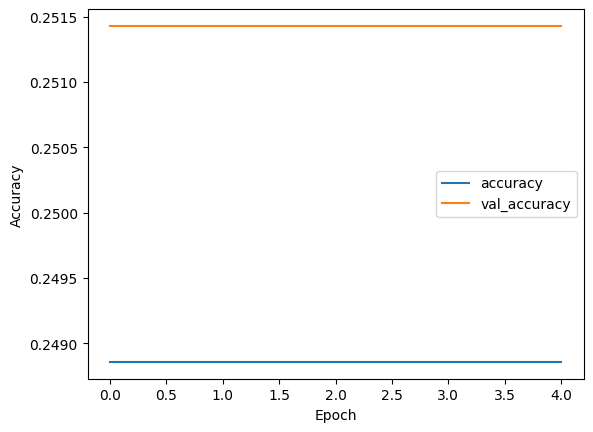

In [15]:
# Plot de la precisión del entrenamiento y validación por epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos para los arrays de entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=dt,
    directory='path_to_images',
    x_col='id',
    y_col='has_cactus',
    subset='training',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(32, 32))

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=dt,
    directory='path_to_images',
    x_col='id',
    y_col='has_cactus',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(32, 32))


TypeError: If class_mode="binary", y_col="has_cactus" column values must be strings.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Cargar el modelo VGG16 pre-entrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas en la parte superior del modelo base
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Leer el archivo CSV
dt = pd.read_csv('train_cactus.csv')

# Dividir el conjunto de datos en entrenamiento y prueba
train, test = train_test_split(dt, test_size=0.2, random_state=42)

# Crear carpetas para los datos de entrenamiento y prueba
os.makedirs('data/train', exist_ok=True)
os.makedirs('data/test', exist_ok=True)

# Función para mover imágenes a las carpetas correspondientes
def move_images(data, folder_name):
    for _, row in data.iterrows():
        image_name = row['id']
        label = 'has_cactus' if row['has_cactus'] == 1 else 'no_cactus'
        os.makedirs(os.path.join(folder_name, label), exist_ok=True)
        shutil.move(os.path.join('path_to_images', image_name),
                    os.path.join(folder_name, label, image_name))

# Mover imágenes
move_images(train, 'data/train')
move_images(test, 'data/test')

# Crear generadores de datos desde directorios
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary')
